In [1]:
import h5py
import pylab as pl
import numpy as np
import matplotlib.colors as mpc
import networkx
import ipyvolume as ipv
import progressbar

In [2]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_tree.dat')

In [3]:
H5 = h5py.File('SatelliteList_V2_cont1R200.h5', 'r')

In [4]:
H5.keys()

<KeysViewHDF5 ['SatelliteCentral', 'SatelliteList']>

In [6]:
central = H5['SatelliteCentral'][()]

In [7]:
cen = np.unique(central)

In [8]:
cen.size

161

In [10]:
groups = sim['SnapNumber_128/SubGroups/GroupNumber'][cen]

34 215


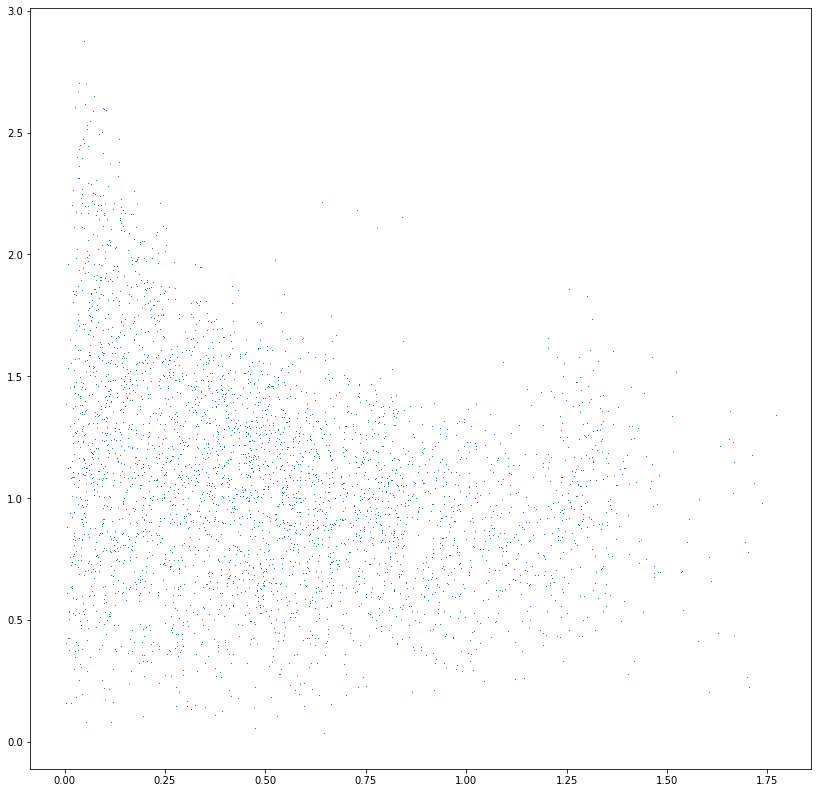

In [19]:
i = 6
gro, bgg = groups[i], cen[i]

G = 4.3009*1e-6 # in kpc (km/s)^2 M_sun^-1
M200 = sim['SnapNumber_128/Groups/Group_M_Crit200'][gro]
R200 = sim['SnapNumber_128/Groups/Group_R_Crit200'][gro]

cenT = sim['SnapNumber_128/SubGroups/SubGroupPos'][bgg]
velT = sim['SnapNumber_128/SubGroups/SubGroupVel'][bgg]

M200 = M200*1e10
vdisp = np.sqrt(G*M200/R200)

off = sim['SnapNumber_128/Groups/PartType1/Offsets'][gro].astype('int')
pos = sim['SnapNumber_128/PartType1/Coordinates'][off[0]:off[1]]
vel = sim['SnapNumber_128/PartType1/Velocities'][off[0]:off[1]]

x, y, z = pos[:,0] - cenT[0], pos[:,1] - cenT[1], pos[:,2] - cenT[2]
vx, vy, vz = vel[:,0] - velT[0],  vel[:,1] - velT[1],  vel[:,2] - velT[2]

r = np.sqrt(x**2+y**2+z**2)
v = np.sqrt(vx**2+vy**2+vz**2)

r200 = r/R200
v200 = v/vdisp

pl.figure(figsize=(14,14))

print(gro, bgg)
pl.plot(r200, v200, marker=',', ls=' ')

In [20]:
M200s = sim['SnapNumber_128/Groups/Group_M_Crit200'][groups]

iss = np.argsort(M200s)

In [30]:
iss2 = np.invert(iss)

groupsi, ceni = groups[iss], cen[iss]

4677 4667


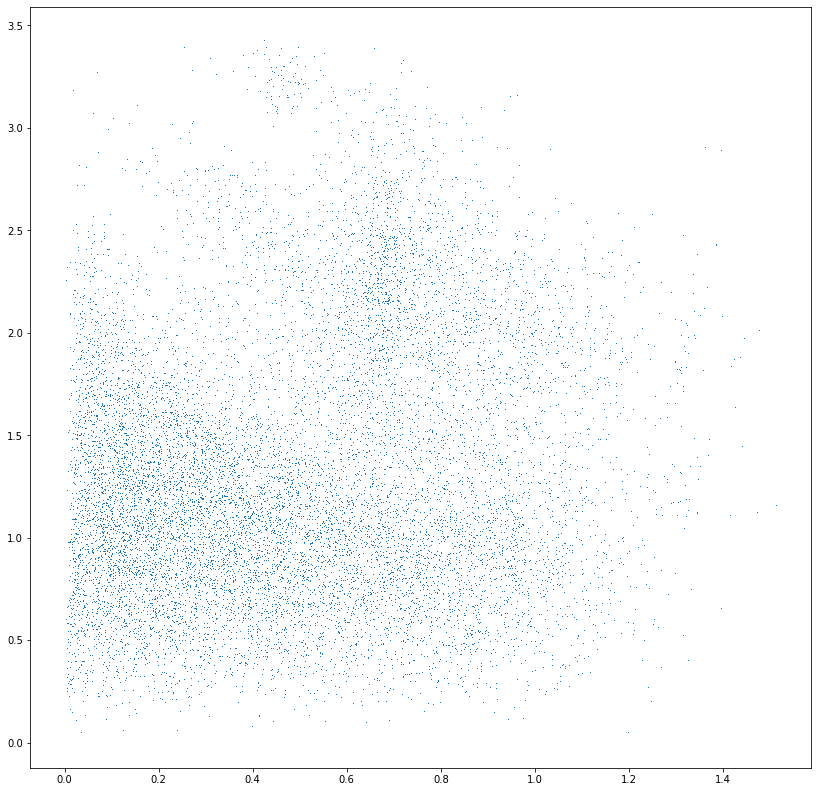

In [43]:
i = -5
gro, bgg = groupsi[i], ceni[i]

G = 4.3009*1e-6 # in kpc (km/s)^2 M_sun^-1
M200 = sim['SnapNumber_128/Groups/Group_M_Crit200'][gro]
R200 = sim['SnapNumber_128/Groups/Group_R_Crit200'][gro]

cenT = sim['SnapNumber_128/SubGroups/SubGroupPos'][bgg]
velT = sim['SnapNumber_128/SubGroups/SubGroupVel'][bgg]

M200 = M200*1e10
vdisp = np.sqrt(G*M200/R200)

off = sim['SnapNumber_128/Groups/PartType1/Offsets'][gro].astype('int')
pos = sim['SnapNumber_128/PartType1/Coordinates'][off[0]:off[1]]
vel = sim['SnapNumber_128/PartType1/Velocities'][off[0]:off[1]]

x, y, z = pos[:,0] - cenT[0], pos[:,1] - cenT[1], pos[:,2] - cenT[2]
vx, vy, vz = vel[:,0] - velT[0],  vel[:,1] - velT[1],  vel[:,2] - velT[2]

r = np.sqrt(x**2+y**2+z**2)
v = np.sqrt(vx**2+vy**2+vz**2)

r200 = r/R200
v200 = v/vdisp

pl.figure(figsize=(14,14))

print(gro, bgg)
pl.plot(r200, v200, marker=',', ls=' ')

In [27]:
M200si = M200s[iss]

In [28]:
M200si

array([0.00000000e+00, 6.13982906e-04, 2.05553230e-03, 2.71080411e-03,
       2.74086394e-03, 2.93974043e-03, 3.36139952e-03, 3.75971850e-03,
       4.43602260e-03, 4.46550734e-03, 4.55415249e-03, 4.75204270e-03,
       4.77101654e-03, 4.88975551e-03, 4.89923730e-03, 5.42160962e-03,
       5.84740378e-03, 5.93294855e-03, 6.34866953e-03, 6.39749784e-03,
       6.72139460e-03, 6.95944671e-03, 7.63899321e-03, 7.97491148e-03,
       8.29071831e-03, 8.34927522e-03, 8.60571302e-03, 8.73997901e-03,
       8.77761934e-03, 8.96284170e-03, 9.72238649e-03, 1.02834394e-02,
       1.07519431e-02, 1.08648073e-02, 1.09163830e-02, 1.09516419e-02,
       1.18784644e-02, 1.19671077e-02, 1.21158706e-02, 1.21202515e-02,
       1.21550746e-02, 1.23810489e-02, 1.25979111e-02, 1.26484074e-02,
       1.27261337e-02, 1.31796505e-02, 1.38326194e-02, 1.44992555e-02,
       1.57226529e-02, 1.57820154e-02, 1.59834176e-02, 1.65540166e-02,
       1.77733712e-02, 1.84532404e-02, 1.92629527e-02, 1.95177738e-02,
      